Accuracy: 0.8333333333333334
Confusion Matrix:
[[10  0  0]
 [ 3  6  0]
 [ 0  2  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.75      0.67      0.71         9
           2       1.00      0.82      0.90        11

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



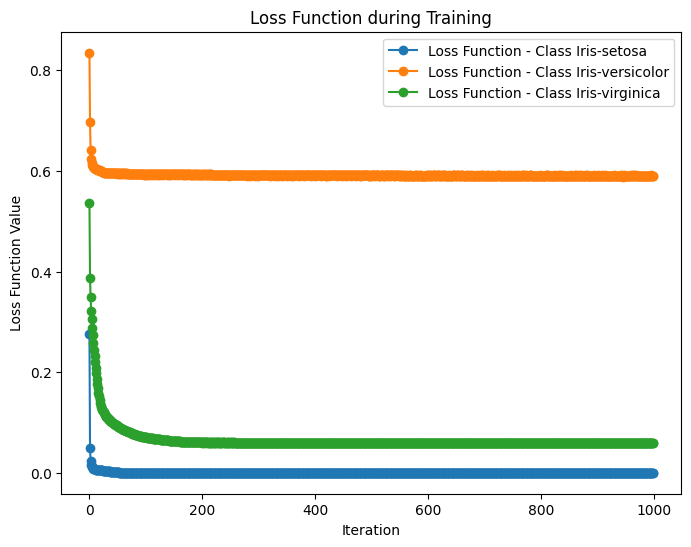

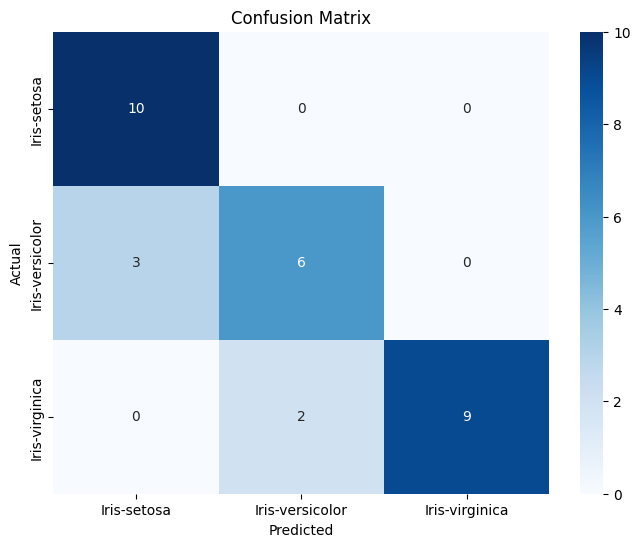

Predictions for new data points:
               New Data Predicted Species
0  [5.0, 3.0, 1.5, 0.2]       Iris-setosa
1  [6.0, 3.5, 4.0, 1.3]       Iris-setosa
2  [7.5, 2.5, 6.0, 2.0]   Iris-versicolor


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the SVM class
class SVM:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.classes = None  # To store unique classes
        self.classifiers = {}  # To store binary classifiers

    def fit(self, X, y):
        self.classes = np.unique(y)

        for i in self.classes:
            binary_y = np.where(y == i, 1, -1)
            classifier = SingleClassSVM(learning_rate=self.learning_rate, n_iterations=self.n_iterations)
            classifier.fit(X, binary_y)
            self.classifiers[i] = classifier

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.classes)))

        for i, cls in enumerate(self.classes):
            predictions[:, i] = self.classifiers[cls].predict(X)

        return np.argmax(predictions, axis=1)


# Define a binary SVM class for a single class
class SingleClassSVM:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.losses = []  # To store loss function values during training

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            total_loss = 0

            for i in range(n_samples):
                loss = max(0, 1 - y[i] * (np.dot(X[i], self.weights) - self.bias))
                total_loss += loss

                if loss > 0:
                    self.weights -= self.learning_rate * (2 * 1 / self.n_iterations * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]

            self.losses.append(total_loss / n_samples)

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) - self.bias)


# Load Iris dataset
iris = pd.read_csv(r"C:\Users\admin\Downloads\BTL AI\Iris.csv")

# Assuming the column names are 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', and 'Species'
expected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

# Check if all expected columns are present
if all(column in iris.columns for column in expected_columns):
    X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
    y = iris['Species']

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Chia dữ liệu thành tập huấn luyện và tập kiểm thử
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình SVM
    svm = SVM(learning_rate=0.01, n_iterations=1000)
    svm.fit(X_train, y_train)

    # Dự đoán trên tập kiểm thử
    predictions = svm.predict(X_test)

    # Convert labels in y_test to integers for consistency
    y_test_int = np.where(y_test == 'Iris-setosa', 0, np.where(y_test == 'Iris-versicolor', 1, 2))

    # Đánh giá mô hình
    accuracy = accuracy_score(y_test_int, predictions)
    print("Accuracy:", accuracy)

    # Hiển thị ma trận nhầm lẫn
    conf_matrix = confusion_matrix(y_test_int, predictions)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Hiển thị báo cáo phân loại
    class_report = classification_report(y_test_int, predictions)
    print("Classification Report:")
    print(class_report)

    # Hiển thị biểu đồ Loss Function qua các bước huấn luyện
    plt.figure(figsize=(8, 6))

    for cls in svm.classifiers.keys():
        plt.plot(np.arange(len(svm.classifiers[cls].losses)), svm.classifiers[cls].losses, label=f'Loss Function - Class {cls}', marker='o')

    plt.title('Loss Function during Training')
    plt.xlabel('Iteration')
    plt.ylabel('Loss Function Value')
    plt.legend()
    plt.show()

    # Enhance Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=iris['Species'].unique(), yticklabels=iris['Species'].unique())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Test with new data points
    new_data = np.array([
        [5.0, 3.0, 1.5, 0.2],
        [6.0, 3.5, 4.0, 1.3],
        [7.5, 2.5, 6.0, 2.0]
    ])

    # Scale the new data points using the same scaler
    new_data_scaled = scaler.transform(new_data)

    # Predict the class of the new data points
    new_predictions = svm.predict(new_data_scaled)
    new_predicted_species = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])[new_predictions]
    print("Predictions for new data points:")
    print(pd.DataFrame({'New Data': new_data.tolist(), 'Predicted Species': new_predicted_species}))

else:
    print("Column names in the DataFrame do not match the expected columns.")
    print("Expected columns:", expected_columns)
    print("Actual columns:", iris.columns)
